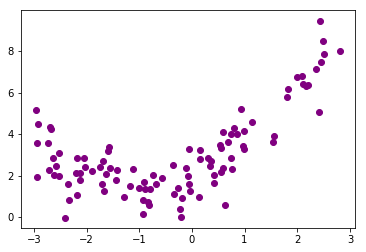

In [64]:
# 사이킷런으로 다항 회귀 수행

# 1. 데이터를 생성하여 확인한다.

import numpy as np
import matplotlib.pyplot as plt

# rand(100,1) : 100행 1열 난수
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# plt.scatter(X좌표, y좌표, color)
plt.scatter(X, y, color = 'purple')

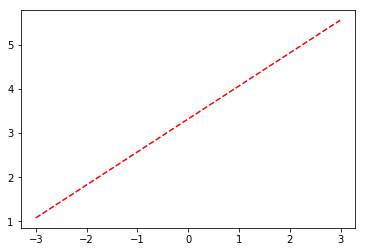

In [65]:
# 2. 비교를 위해 단순 선형 회귀 실행
import sklearn.linear_model as lm

# 원본은 1차원(arrange)이고, 이를 2차원으로 늘림[:, np.newaxis]
X_test = np.arange(-3, 3, 0.01)[:, np.newaxis]

X1_train = X
y_train = y

reg1 = lm.LinearRegression().fit(X1_train, y_train)

X1_test = X_test
y1_pred = reg1.predict(X1_test)

plt.plot(X_test, y1_pred, color = "red", linestyle = "--")

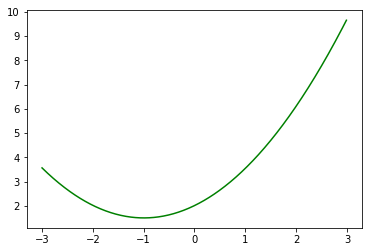

In [68]:
# 2차항 형태로 다항 회귀
import sklearn.linear_model as lm
import sklearn.preprocessing as pp

X_test = np.arange(-3, 3, 0.01)[:, np.newaxis]

# 다항식 형태로 변환하는 객체 생성
poly = pp.PolynomialFeatures(degree = 2)

# X를 다항식 형태로 변환 후 훈련용 데이터로 사용
X2_train = poly.fit_transform(X)
y_train = y

# 회귀 객체 생성 후 훈련시킴
reg2 = lm.LinearRegression().fit(X2_train, y_train)

# 검증용 데이터를 다항식 형태로 변환 후 예측값 구함
X2_test = poly.fit_transform(X_test)
y2_pred = reg2.predict(X2_test)

plt.plot(X_test, y2_pred, color = 'green')

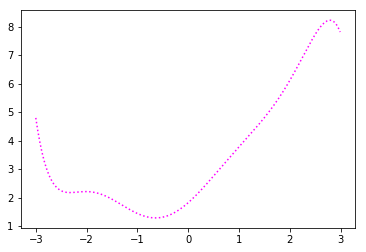

In [71]:
# 2차항 형태로 다항 회귀
import sklearn.linear_model as lm
import sklearn.preprocessing as pp

X_test = np.arange(-3, 3, 0.01)[:, np.newaxis]

# 다항식 형태로 변환하는 객체 생성
poly = pp.PolynomialFeatures(degree = 7)

# X를 다항식 형태로 변환 후 훈련용 데이터로 사용
X7_train = poly.fit_transform(X)
y_train = y

# 회귀 객체 생성 후 훈련시킴
reg7 = lm.LinearRegression().fit(X7_train, y_train)

# 검증용 데이터를 다항식 형태로 변환 후 예측값 구함
X7_test = poly.fit_transform(X_test)
y7_pred = reg7.predict(X7_test)

plt.plot(X_test, y7_pred, color = 'magenta', linestyle = ':')

In [3]:
import sklearn.datasets as d
import pandas as pd

boston = d.load_boston()
boston_df = pd.DataFrame(boston.data)

# 컬럼이름 설정
boston_df.columns = boston.feature_names

# 종속변수 설정
boston_df["PRICE"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# 독립변수를 RM으로 설정. X는 독립변수이므로 시리즈가 아니라 2차원이여야 함.
X = pd.DataFrame(boston_df["RM"])
# X = boston.data[:, 5]

# 종속변수
y = boston_df["PRICE"]
# y = boston.target

In [13]:
# 학습/검증용 데이터 생성
import sklearn.model_selection as ms
import numpy as np

X_train, X_test, y_train, y_test =  ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

# 그림을 그리기 위해 좌표계를 생성
# RM의 값의 범위를 정확히 모르므로, RM의 최소값 -1 ~ RM의 최대값 +1을 좌표계 범위로 지정
# np.arrange(시작, 끝(포함X), 간격)
# np.linspace(시작, 끝(포함), 개수(기본값 50))
# 1차원을 2차원으로 확장 : [:, np.newaxis]
xx = np.linspace(X["RM"].min() - 1, X["RM"].max() + 1)[:, np.newaxis]

# 1차식 하고 저장, 2차식 하고 저장... 할 리스트 생성
mses = []
rmses = []
r2s = []

In [14]:
# 회귀모형 생성
import sklearn.linear_model as lm    # 회귀를 하기 위함
import sklearn.metrics as mt    # mse, r2 구하기 위함
import numpy as np    # rmse 구하기 위함
import matplotlib.pyplot as plt    # 그림을 그리기 위함

lr = lm.LinearRegression()

# 단순 선형 회귀(1차식)
## 학습
reg = lr.fit(X_train, y_train)

## 예측
y1_pred = reg.predict(X_test)

## 예측값(실제, 회귀)
mse = mt.mean_squared_error(y_test, y1_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y1_pred)

# 예측값을 저장 리스트에 담음
mses.append(mse)
rmses.append(rmse)
r2s.append(r2)

# x좌표에 대응하는 y좌표 생성
yy1 = reg.predict(xx)

In [15]:
# 다항 회귀(2차식)
import sklearn.preprocessing as pp

# 불리기 도구 생성(degree = 차수)
quad = pp.PolynomialFeatures(degree=2)

# 기존 학습데이터를 2차식으로 불리기
X2_train = quad.fit_transform(X_train)

## 학습
reg = lr.fit(X2_train, y_train)

# 기존 검증데이터를 2차식으로 불리기
X2_test = quad.fit_transform(X_test)

## 예측
y2_pred = reg.predict(X2_test)

## 예측값(실제, 회귀)
mse = mt.mean_squared_error(y_test, y2_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y2_pred)

# 예측값을 저장 리스트에 담음
mses.append(mse)
rmses.append(rmse)
r2s.append(r2)

# 좌표계를 2차식으로 불리기
xx2 = quad.fit_transform(xx)
# x좌표에 대응하는 y좌표 생성
yy2 = reg.predict(xx2)

In [16]:
# 다항 회귀(3차식)
import sklearn.preprocessing as pp

# 불리기 도구 생성(degree = 차수)
cubic = pp.PolynomialFeatures(degree=3)

# 기존 학습데이터를 3차식으로 불리기
X3_train = cubic.fit_transform(X_train)

## 학습
reg = lr.fit(X3_train, y_train)

# 기존 검증데이터를 2차식으로 불리기
X3_test = cubic.fit_transform(X_test)

## 예측
y3_pred = reg.predict(X3_test)

## 예측값(실제, 회귀)
mse = mt.mean_squared_error(y_test, y3_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y3_pred)

# 예측값을 저장 리스트에 담음
mses.append(mse)
rmses.append(rmse)
r2s.append(r2)

# 좌표계를 2차식으로 불리기
xx3 = cubic.fit_transform(xx)
# x좌표에 대응하는 y좌표 생성
yy3 = reg.predict(xx3)

In [24]:
scores = pd.DataFrame()
scores['MSE'] = mses
scores["RMSE"] = rmses
scores["R2"] =r2s
scores.index = ["linear", "quad", "cubic"]

# display() : 구조를 그대로 출력해줌
# print : 문자구조만 출력해줌
# 그냥 변수 : 주피터노트북이 그냥 마지막에 있는 변수 출력해준 것
display(scores)  # 2차식일 때 가장 좋은 것을 확인!

,MSE,RMSE,R2
linear,36.517215,6.042948,0.601577
quad,30.515171,5.524054,0.667063
cubic,30.541433,5.526430,0.666776


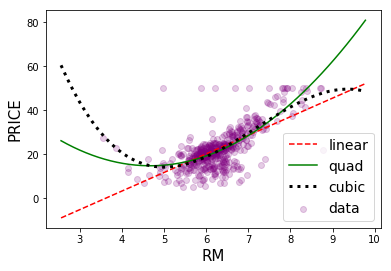

,MSE,RMSE,R2
linear,36.517215,6.042948,0.601577
quad,30.515171,5.524054,0.667063
cubic,30.541433,5.526430,0.666776


In [39]:
# 기존 데이터. alpha : 0(옅음) ~ 1(진함)
plt.scatter(X, y, color = 'purple', label = 'data', alpha = 0.2)
# 1차식 데이터
plt.plot(xx, yy1, color = 'red', linestyle = '--', label = 'linear')
# 2차식 데이터
plt.plot(xx, yy2, color = 'green', linestyle = '-', label = 'quad')
# 3차식 데이터
plt.plot(xx, yy3, color = 'black', linestyle = ':', linewidth = 3, label = 'cubic')
# 범례 표시
plt.legend(fontsize = 14)
# 축 서식
plt.xlabel("RM", fontsize = 15)
plt.ylabel("PRICE", fontsize = 15)
# 지금까지 세팅한 것을 하나로 명시(명시 안해도 보여줌)
plt.show()
display(scores)

In [ ]:
# KFold를 이용한 교차 검증

In [40]:
import sklearn.model_selection as ms

kfold = ms.KFold(5)

In [41]:
import sklearn.datasets as d
import sklearn.linear_model as lm

diab = d.load_diabetes()
X = diab.data
y = diab.target

lr = lm.LinearRegression()

In [42]:
import sklearn.metrics as mt

n_iter = 0
r2_scores = []

for train_num, test_num in kfold.split(X) :
    X_train, X_test = X[train_num], X[test_num]
    y_train, y_test = y[train_num], y[test_num]
    
    reg = lr.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    n_iter += 1
    r2_scores.append(mt.r2_score(y_test, y_pred))

In [43]:
import numpy as np

for i in range(n_iter) :
    print("{}회차 R2: {:.3f}".format(i+1, r2_scores[i]))
print("평균 R2:", np.round(np.mean(r2_scores), 3))

1회차 R2: 0.430
2회차 R2: 0.523
3회차 R2: 0.483
4회차 R2: 0.427
5회차 R2: 0.550
평균 R2: 0.482


In [72]:
# cross_val_score 함수를 이용한 교차 검증
import sklearn.datasets as d
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import numpy as np

diab = d.load_diabetes()
X = diab.data
y = diab.target
lr = lm.LinearRegression()

# 선형회귀에 대한 scoring의 기본값은 결정계수
r2_scores = ms.cross_val_score(lr, X, y, cv = 5)

print("교차 검증 회차별 R2:", np.round(r2_scores, 3))
print("평균 R2:", np.round(np.mean(r2_scores), 3))

교차 검증 회차별 R2: [0.43  0.523 0.483 0.427 0.55 ]
평균 R2: 0.482


In [46]:
# kfold를 미리 만들어 cross_val_score에 적용

diab = d.load_diabetes()
lr = lm.LinearRegression()

kflod = ms.KFold(3, shuffle = True, random_state = 0)
r2_scores = ms.cross_val_score(lr, diab.data, diab.target, cv=kfold)

print("교차 검증 회차별 R2:", np.round(r2_scores, 3))
print("평균 R2:", np.round(np.mean(r2_scores), 3))

교차 검증 회차별 R2: [0.43  0.523 0.483 0.427 0.55 ]
평균 R2: 0.482


In [ ]:
# 실습 : kfold

In [51]:
import sklearn.datasets as d
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as mt
import numpy as np


boston = d.load_boston()
X = boston.data
y = boston.target

lr = lm.LinearRegression()
kfold = ms.KFold(5, shuffle = True, random_state = 42)

r2s = []
n_iter = 0

for train_num, test_num in kfold.split(X) :
    X_train, X_test = X[train_num], X[test_num]
    y_train, y_test = y[train_num], y[test_num]
    
    reg = lr.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    r2 = mt.r2_score(y_test, y_pred)
    r2s.append(r2)
    
    n_iter += 1
    
for i in range(n_iter) :
    print("{} => {:.3f}".format(i+1, r2s[i]))
print("AVG R2 =",np.round(np.mean(r2s), 3))

1 => 0.668
2 => 0.734
3 => 0.710
4 => 0.776
5 => 0.687
AVG R2 = 0.715


In [ ]:
# 실습 : cross_val_score

In [58]:
import sklearn.datasets as d
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import numpy as np

boston = d.load_boston()
X = boston.data
y = boston.target

lr = lm.LinearRegression()
kfold = ms.KFold(5, shuffle = True, random_state = 42)

r2s = ms.cross_val_score(lr, X, y, cv = kfold)

print("교차 검증 회차별 R2 :", np.round(r2_scores, 3))
print("평균 R2 :", np.round(np.mean(r2_scores), 3))

교차 검증 회차별 R2 : [0.67  0.716 0.758]
평균 R2 : 0.715
